<a href="https://colab.research.google.com/github/ProgrammedThought/Text-Summarizer/blob/main/Data_Analytics_Cluster_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import gc
import matplotlib.pyplot as plt

In [ ]:
#Import data file
traindata = pd.read_csv('/content/drive/MyDrive/final_data_4_Cluster_22/final_data_4_Cluster_11.csv')

testdata = pd.read_csv('/content/drive/MyDrive/final_data_4_Cluster_22/final_data_4_Cluster_11_test 1.csv')

print(testdata.shape)
null_counts = testdata.isnull().sum()
print("Columns with null values:")
print(null_counts[null_counts > 0])

data = pd.concat([traindata, testdata], axis=0)

print(traindata.columns)
print(testdata.columns)
print(traindata.shape)
print(testdata.shape)
print(data.shape)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/final_data_4_Cluster_22/final_data_4_Cluster_11.csv'

In [ ]:
print(data.head(5))

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and it includes a column named 'StateHoliday'
# This will create a new DataFrame with one-hot encoded columns for the 'StateHoliday' column
one_hot_encoded_df = pd.get_dummies(data, columns=['StateHoliday'])

# Display the new DataFrame to see the one-hot encoded columns
print(one_hot_encoded_df.head())

In [ ]:
data = one_hot_encoded_df

In [ ]:
print(data.columns)

#Display the number of missing (or NaN) values in each column of the data
NAN_count = data.isna().sum()
print("NAN count before: \n", NAN_count)

data = data.drop(columns=['Customers'])
data = data.drop(columns=['Cluster'])

NAN_count = data.isna().sum()
print("NAN count after dropping the customers column: \n", NAN_count)

In [ ]:
print(data.head(10))

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data = data.sort_values(['Date', 'Store'])
data.reset_index(drop=True, inplace=True)
print(data.head(20))


In [ ]:
print(data.groupby(['Store', 'Storetypea', 'Storetypeb', 'Storetypec', 'Storetyped', 'Assortmenta', 'Assortmentb', 'Assortmentc'])['Sales'])


In [ ]:
#Rolling statistics

data['Rolling_Mean_1Week'] = data.groupby(['Store', 'Storetypea', 'Storetypeb', 'Storetypec', 'Storetyped', 'Assortmenta', 'Assortmentb', 'Assortmentc'])['Sales'].transform(lambda x: x.rolling(7, min_periods=7).mean().shift())

data['Rolling_SD_1Week'] = data.groupby(['Store', 'Storetypea', 'Storetypeb', 'Storetypec', 'Storetyped', 'Assortmenta', 'Assortmentb', 'Assortmentc'])['Sales'].transform(lambda x: x.rolling(7, min_periods=7).std().shift())

data['Rolling_Mean_2weeks'] = data.groupby(['Store', 'Storetypea', 'Storetypeb', 'Storetypec', 'Storetyped', 'Assortmenta', 'Assortmentb', 'Assortmentc'])['Sales'].transform(lambda x: x.rolling(14, min_periods=14).mean().shift())

data['Rolling_SD_2weeks'] = data.groupby(['Store', 'Storetypea', 'Storetypeb', 'Storetypec', 'Storetyped', 'Assortmenta', 'Assortmentb', 'Assortmentc'])['Sales'].transform(lambda x: x.rolling(14, min_periods=14).std().shift())

data['Rolling_Mean_1year'] = data.groupby(['Store', 'Storetypea', 'Storetypeb', 'Storetypec', 'Storetyped', 'Assortmenta', 'Assortmentb', 'Assortmentc'])['Sales'].transform(lambda x: x.rolling(365, min_periods=365).mean().shift())

data['Rolling_SD_1year'] = data.groupby(['Store', 'Storetypea', 'Storetypeb', 'Storetypec', 'Storetyped', 'Assortmenta', 'Assortmentb', 'Assortmentc'])['Sales'].transform(lambda x: x.rolling(365, min_periods=365).std().shift())






In [ ]:
# Check for null values in each column
null_counts = data.isnull().sum()

# Print columns with null values
print("Columns with null values:")
print(null_counts[null_counts > 0])

In [ ]:
data = data.drop(columns=['CompetitionOpenSinceMonth'])
data = data.drop(columns=['CompetitionOpenSinceYear'])
data = data.drop(columns=['CompetitionOpenSince'])

In [ ]:
# Check for null values in each column
null_counts = data.isnull().sum()

# Print columns with null values
print("Columns with null values:")
print(null_counts[null_counts > 0])

In [ ]:
data = data.drop(columns=['StoreType'])
data = data.drop(columns=['Assortment'])

In [ ]:
print(data[['Rolling_Mean_1Week', 'Rolling_SD_1Week', 'Rolling_Mean_2weeks', 'Rolling_SD_2weeks', 'Rolling_Mean_1year', 'Rolling_SD_1year']].tail(100))


        Rolling_Mean_1Week  Rolling_SD_1Week  Rolling_Mean_2weeks  \
378164                 NaN               NaN                  NaN   
378165                 NaN               NaN                  NaN   
378166                 NaN               NaN                  NaN   
378167                 NaN               NaN                  NaN   
378168                 NaN               NaN                  NaN   
...                    ...               ...                  ...   
378259                 NaN               NaN                  NaN   
378260                 NaN               NaN                  NaN   
378261                 NaN               NaN                  NaN   
378262                 NaN               NaN                  NaN   
378263                 NaN               NaN                  NaN   

        Rolling_SD_2weeks  Rolling_Mean_1year  Rolling_SD_1year  
378164                NaN                 NaN               NaN  
378165                NaN              

In [ ]:
#Dropping null valued rows after creating additional features to not let any null value impact test data rows
data = data.dropna(subset= ['Rolling_Mean_1Week', 'Rolling_SD_1Week', 'Rolling_Mean_2weeks', 'Rolling_SD_2weeks', 'Rolling_Mean_1year', 'Rolling_SD_1year'])
null_counts = data.isnull().sum()
print("Columns with null values:")
print(null_counts[null_counts > 0])

data = data.sort_values(['Date', 'Store'])
data = data.reset_index(drop=True)

Columns with null values:
Sales    266
dtype: int64


In [ ]:
print(data.tail(5))

        Store  DayOfWeek       Date   Sales  Open  Promo  SchoolHoliday  \
223871   1100          5 2015-07-31  7270.0     1      1              1   
223872   1102          5 2015-07-31  7211.0     1      1              0   
223873   1107          5 2015-07-31  9433.0     1      1              0   
223874   1108          5 2015-07-31  6602.0     1      1              1   
223875   1111          5 2015-07-31  5723.0     1      1              1   

        CompetitionDistance  Promo2  Promo2SinceWeek  ...  StateHoliday_0  \
223871                  540       1               14  ...            True   
223872                  850       1               40  ...            True   
223873                 1400       1               13  ...            True   
223874                  540       0                1  ...            True   
223875                 1900       1               31  ...            True   

        StateHoliday_a  StateHoliday_b  StateHoliday_c  Rolling_Mean_1Week  \
223871  

In [ ]:
#Splitting data in preparation for the use of our machine learning model
#extract only data of open stores
data['Date'] = pd.to_datetime(data['Date'])
df_open = data[data["Open"] == 1]
df = df_open

df = df.drop(["Open"], axis = 1)
data = df
def indexFinder(data, date):
  """
  Returns the index of the last instance of a date
  """
  i = data.loc[(data['Date'] == date)].index[-1]
  return i

data = data.sort_values(['Date', 'Store'])
data = data.reset_index(drop=True)

#Finding indexes of sets
last_index_train = indexFinder(data, '2015-07-31')

first_index_test = indexFinder(data, '2015-07-31') +1

traindata = data.loc[:last_index_train, :]

testdata = data.loc[first_index_test:, :]

y_train, y_test = traindata[['Sales']], testdata[["Sales"]]

X_train = traindata.drop(["Sales"], axis = 1)
X_test = testdata.drop(["Sales"], axis = 1)


In [ ]:
print(X_test.head())

Empty DataFrame
Columns: [Store, DayOfWeek, Date, Promo, SchoolHoliday, CompetitionDistance, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval1, PromoInterval2, PromoInterval3, NoPromo, Storetypea, Storetypeb, Storetypec, Storetyped, Assortmenta, Assortmentb, Assortmentc, MonthsSinceCompetitionOpen, WeeksSincePromo, Month, Day, StateHoliday_0, StateHoliday_a, StateHoliday_b, StateHoliday_c, Rolling_Mean_1Week, Rolling_SD_1Week, Rolling_Mean_2weeks, Rolling_SD_2weeks, Rolling_Mean_1year, Rolling_SD_1year]
Index: []

[0 rows x 34 columns]


In [ ]:
print("xtrain: ", X_train.shape)
print("ytrain: ", y_train.shape)

print("xtest: ", X_test.shape)
print("ytest: ", y_test.shape)

xtrain:  (169650, 34)
ytrain:  (169650, 1)
xtest:  (15908, 34)
ytest:  (15908, 1)


In [ ]:
print(X_train.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear',
       'PromoInterval1', 'PromoInterval2', 'PromoInterval3', 'NoPromo',
       'Storetypea', 'Storetypeb', 'Storetypec', 'Storetyped', 'Assortmenta',
       'Assortmentb', 'Assortmentc', 'MonthsSinceCompetitionOpen',
       'WeeksSincePromo', 'Month', 'Day', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'Rolling_Mean_1Week',
       'Rolling_SD_1Week', 'Rolling_Mean_2weeks', 'Rolling_SD_2weeks',
       'Rolling_Mean_1year', 'Rolling_SD_1year'],
      dtype='object')


In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

In [ ]:
print(data.dtypes)

Store                                  int64
DayOfWeek                              int64
Date                          datetime64[ns]
Sales                                float64
Promo                                  int64
SchoolHoliday                          int64
CompetitionDistance                    int64
Promo2                                 int64
Promo2SinceWeek                        int64
Promo2SinceYear                        int64
PromoInterval1                         int64
PromoInterval2                         int64
PromoInterval3                         int64
NoPromo                                int64
Storetypea                             int64
Storetypeb                             int64
Storetypec                             int64
Storetyped                             int64
Assortmenta                            int64
Assortmentb                            int64
Assortmentc                            int64
MonthsSinceCompetitionOpen             int64
WeeksSince

In [ ]:
print("xtrain: ", X_train.shape)
print("ytrain: ", y_train.shape)

print("xtest: ", X_test.shape)
print("ytest: ", y_test.shape)


X_train = X_train.drop(["Date"], axis = 1)



xtrain:  (169650, 34)
ytrain:  (169650, 1)
xtest:  (15908, 34)
ytest:  (15908, 1)


In [ ]:
X_test = X_test.drop(["Date"], axis = 1)

print("xtrain: ", X_train.shape)
print("ytrain: ", y_train.shape)

print("xtest: ", X_test.shape)
print("ytest: ", y_test.shape)

xtrain:  (169650, 33)
ytrain:  (169650, 1)
xtest:  (15908, 33)
ytest:  (15908, 1)


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
# Create an instance of TimeSeriesSplit
time_series_cv = TimeSeriesSplit(n_splits=5)

In [ ]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

model.fit(X_train, y_train)

#Cross-validation score of base model
cv_score = cross_val_score(model, X_train, y_train, cv=time_series_cv)
#Calculate and print the mean cross-validation score
mean_cv_score = np.mean(cv_score)


<ipython-input-61-2cccdcf008f0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

In [ ]:
#Prints Random Forest Regressor's mean cross-validation score
print("Base model's mean cross-validation score is: ", mean_cv_score)

Base model's mean cross-validation score is:  0.8858526529815889


In [ ]:
#Prints R-squared value for model on training data
print("Base model's R-squared value on training data is: ",model.score(X_train, y_train))

#Prints R-squared value for model on testing data
print("Base model's R-squared value on testing data is: ",model.score(X_test, y_test))


Base model's R-squared value on training data is:  0.9922808819498772
Base model's R-squared value on testing data is:  0.9229699622332714


In [ ]:
pred = model.predict(X_test)
MAE_base = mean_absolute_error(y_test, pred)
print("Mean Absolute error after:", MAE_base)

Mean Absolute error after: 594.4814775618605


In [ ]:
print(y_test.shape)
print(pred.shape)

(15908, 1)
(15908,)


In [ ]:
# Define RMSPE function
def rmspe(y_true, y_pred):
    mask = y_true != 0
    rmspe = np.sqrt(np.mean(((y_true[mask] - y_pred[mask]) / y_true[mask]) ** 2))
    return rmspe

y_test = y_test.values
y_test = y_test.ravel()

print("RMSPE is:", rmspe(y_test,pred))

RMSPE is: 0.14013890736474557


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_true contains the true target values and y_pred contains the predicted values
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 429.2456112531123


In [ ]:
import numpy as np

def rmspe(y_true, y_pred):
    # Remove zeros from denominator to avoid division by zero
    mask = y_true != 0
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    # Calculate RMSPE
    rmspe = np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2))
    return rmspe

# Example usage:

print(rmspe(np.array(y_test), np.array(pred)))




IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

Feature ranking:
1. Rolling_SD_1year: 0.33711380866973517
2. Promo: 0.13232677949540295
3. Rolling_Mean_1year: 0.10967891778302616
4. day_of_week_sin: 0.04490526353858033
5. Day: 0.04062820263300673
6. Rolling_SD_2weeks: 0.03644045807483836
7. Store: 0.035911620348264596
8. Rolling_SD_1Week: 0.035590414934704974
9. Rolling_Mean_2weeks: 0.035549407338162364
10. Rolling_Mean_1Week: 0.033213050669110386
11. Month: 0.032602804144959356
12. MonthsSinceCompetitionOpen: 0.027110186173520998
13. DayOfWeek: 0.02280888398115293
14. CompetitionDistance: 0.017885394190825875
15. day_of_week_cos: 0.01515456470942501
16. WeeksSincePromo: 0.009547801358273964
17. Promo2SinceWeek: 0.00846881144007189
18. Promo2SinceYear: 0.003937161339793129
19. SchoolHoliday: 0.0032421271765400287
20. Assortmenta: 0.002233185307862585
21. Assortmentc: 0.002202833933087466
22. PromoInterval2: 0.0020539128178392796
23. Storetypec: 0.0018024893491543747
24. Storetyped: 0.0016284055062279175
25. NoPromo: 0.00159692546710

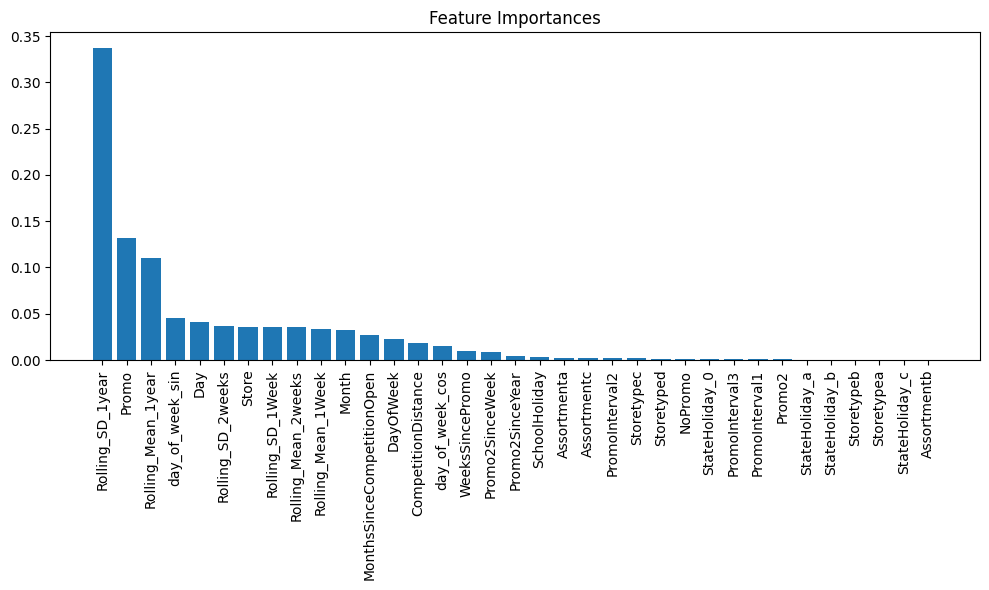

In [ ]:
#Using the base model, let's see the feature importances
feature_importances = model.feature_importances_

feature_names = X_train.columns

#Sorting the indices by importance in a descending order
indices = np.argsort(feature_importances)[::-1]

#Display the features in order of decreasing importance
print("Feature ranking:")
for f in range(len(feature_names)):
    print(f"{f + 1}. {feature_names[indices[f]]}: {feature_importances[indices[f]]}")

#Displaying a bar plot feature importances in Random Forest
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_names)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()